<h1>Weather Data Visualization Project</h1>

<h2>Introduction</h2>
<h5>This project focuses on visualizing and analyzing historical weather data using Python.

We will use the `weatherHistory.csv` dataset, which contains detailed weather conditions such as temperature, humidity, wind speed, and more, recorded over time.

Our goals:
- Explore trends and patterns in weather conditions.
- Clean and preprocess the data for analysis.
- Visualize different weather variables using charts.
- Derive useful insights from the data.</h5>

<h1>Install Required Libraries</h1>

In [ ]:
pip install pandas numpy seaborn matplotlib

<h1>Import Libraries</h1>

In [5]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Theme
plt.style.use('dark_background')

# seaborn style to minimal
sns.set_style('darkgrid')

# set default color palette
custom_color = 'skyblue'

<h1>Load Datase</h1>

In [6]:
# Load the dataset

df = pd.read_csv('WeatherDataset.csv')

# Display First 5 Rows
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


<h1>Basic Data Overview</h1>

In [7]:
# shape of data (rows, columns)
df.shape

# column info and datatypes
df.info()

# Basic statistics
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


<h1>Data Cleaning</h1>

In [8]:
# Check for Missing Values
df.isnull().sum()

# Drop or Handle Nulls (if few)
df.dropna(inplace=True)


# Convert Date Column to datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.set_index('Formatted Date', inplace=True)

<h1>Exploratory Data Analysis (EDA)</h1>

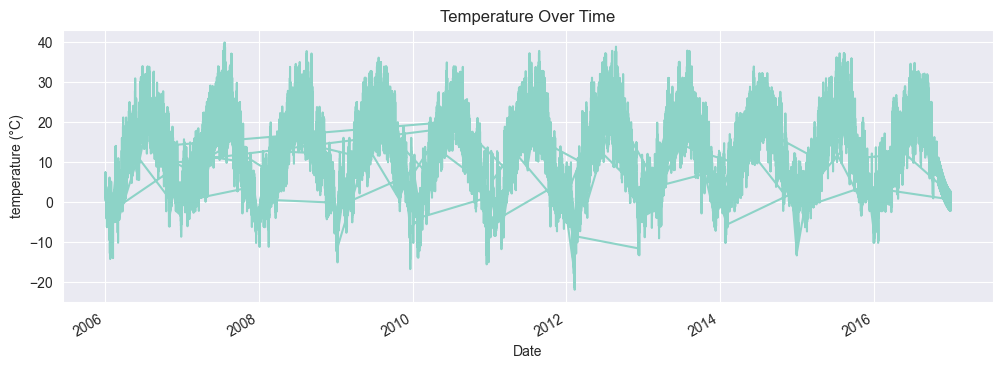

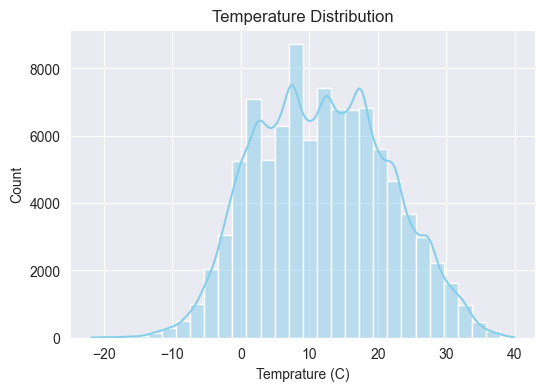

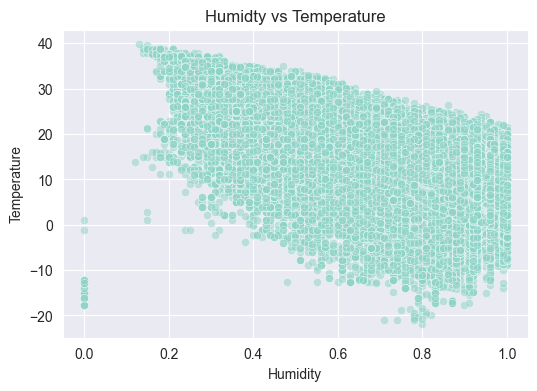

In [10]:
# View Column Names
df.columns

#Check Unique Values in Categorical Columns
df['Summary'].value_counts()
df['Precip Type'].value_counts()

#Plot Temperature Over Time
plt.figure(figsize=(12, 4))
df['Temperature (C)'].plot(title="Temperature Over Time")
plt.xlabel("Date")
plt.ylabel('temperature (°C)')
plt.show()



# Histogram of Temperature
plt.figure(figsize=(6, 4))
sns.histplot(df['Temperature (C)'], bins=30, kde=True, color='skyblue') # type: ignore
plt.title("Temperature Distribution")
plt.xlabel('Temprature (C)')
plt.show()


# Humidity vs. Temperature

plt.figure(figsize=(6,4))
sns.scatterplot(data= df, x='Humidity', y='Temperature (C)', alpha=0.5)
plt.title("Humidty vs Temperature")
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()



<h1>Visualizations (grouped insights)</h1>

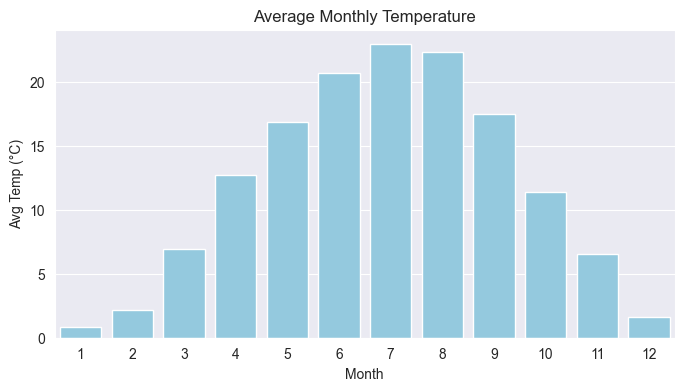

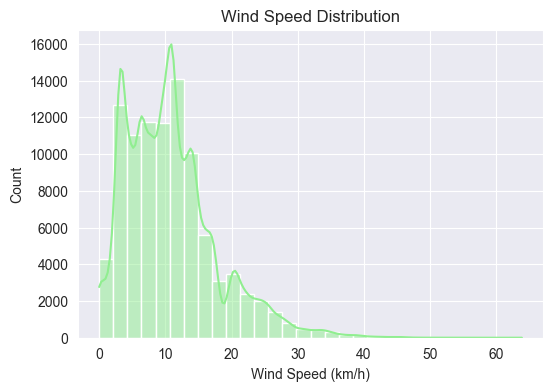

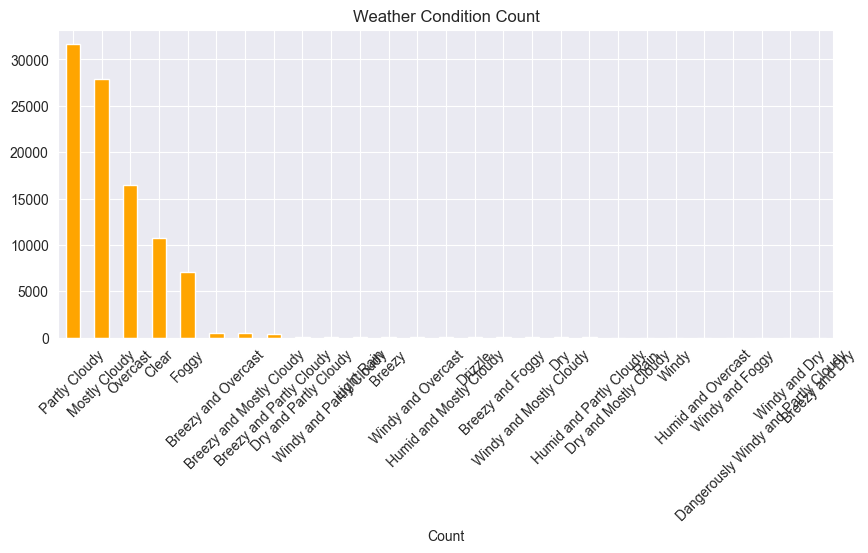

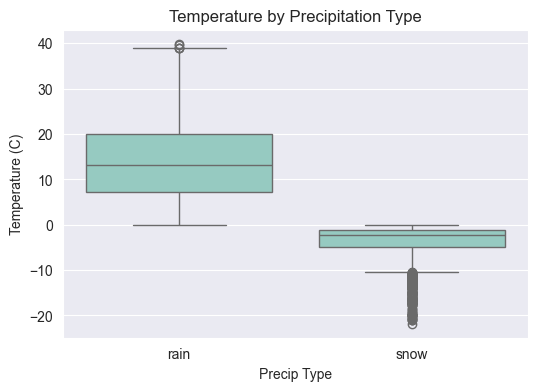

In [11]:
# Average Monthly Temperature
df.index = pd.to_datetime(df.index)

df['Month'] = df.index.month
monthy_avg = df.groupby('Month')['Temperature (C)'].mean()

plt.figure(figsize=(8, 4))
sns.barplot(x=monthy_avg.index, y=monthy_avg.values, color='skyblue')
plt.title("Average Monthly Temperature")
plt.xlabel('Month')
plt.ylabel('Avg Temp (°C)')
plt.show()


# Wind Speed Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Wind Speed (km/h)', bins=30, kde=True, color='lightgreen')
plt.title("Wind Speed Distribution")
plt.xlabel('Wind Speed (km/h)')
plt.show()


# Weather Summary Count
plt.figure(figsize=(10, 4))
df['Summary'].value_counts().plot(kind='bar', color='orange')
plt.title("Weather Condition Count")
plt.xlabel("Count")
plt.xticks(rotation=45)
plt.show()

#  Boxplot of Temperature by Precip Type
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Precip Type', y='Temperature (C)')
plt.title("Temperature by Precipitation Type")
plt.show()


<h1>Heatmap: Correlation Between Variables</h1>

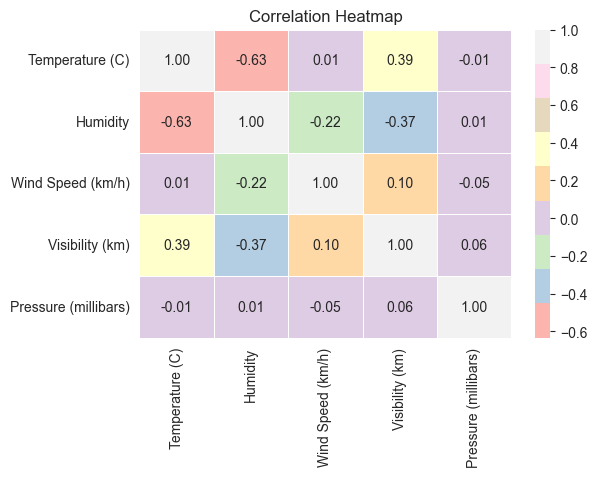

In [44]:
# Compute correlation matrix
corr = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']].corr()

# plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='Pastel1', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<h1> Insights & Summary</h1>

### Key Observations
- **Consistent Seasonal Pattern**  
  Temperature follows a yearly cycle with clear summer peaks (~30–40°C) and winter lows (~−10°C), visible across more than 10 years of data.

- **Temperature Distribution**  
  Most temperatures lie between **0°C and 20°C**, with a smooth bell-shaped distribution. Extreme cold and heat are rare.

- **Humidity vs Temperature**  
  A strong **negative correlation (−0.63)** suggests higher humidity usually comes with lower temperatures — typical in rainy or cloudy conditions.

- **Visibility vs Temperature**  
  A moderate **positive correlation (+0.39)** shows that warmer days tend to have better visibility.

- **Monthly Temperature Trends**  
  - **July and August** are the hottest months.
  - **December and January** are the coldest.
  - Clear seasonal shift seen in monthly averages.

- **Wind Speed**  
  Most days have wind speeds between **5–15 km/h**, with few extreme days reaching up to 60 km/h.

- **Weather Conditions**  
  - Most frequent: *Partly Cloudy*, *Mostly Cloudy*, *Overcast*.
  - Rare events include: *Rain*, *Fog*, *Snow* — suggesting mostly cloudy climate.

- **Precipitation Type vs Temperature**  
  - **Rain** occurs in warmer temperatures (5°C to 25°C).
  - **Snow** occurs only in freezing conditions (−10°C to 0°C).
  - Distinct temperature split between rain and snow.

---

###  Conclusion

This analysis of historical weather data reveals clear patterns in seasonal behavior, humidity relationships, and common weather types. With these insights, further work could involve:
- Forecasting temperatures,
- Detecting extreme weather trends,
- Comparing with future years or cities.
